Now that we have our data, the next step is to clean up the datafiles and create graphocs. We'll start by importing the proper packages and opening the data files for each college prerequisite list as well as each of the four subject clusters in the College of Letters and Science.

In [70]:
# Importing packages for word visualizations
import csv
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Opening the datafiles for each of the college prerequisites
engCsv = open('engreqs.csv','r')
lsCsv = open('lsreqs.csv','r')
agCsv = open('agreqs.csv','r')
bioCsv = open('bioreqs.csv','r')
faCsv = open('fareqs.csv','r')
ssCsv = open('ssreqs.csv','r')
mpCsv = open('mpreqs.csv','r')
hmCsv = open ('hmreqs.csv','r')

# Reading the contents of the csv files into memory
engTable = csv.reader(engCsv)
lsTable  = csv.reader(lsCsv)
agTable = csv.reader(agCsv)
bioTable = csv.reader(bioCsv)
faTable = csv.reader(faCsv)
ssTable = csv.reader(ssCsv)
mpTable = csv.reader(mpCsv)
hmTable = csv.reader(hmCsv)




The next step is to clean up the data. There were a few strings of text that slipped through the initial function and we need to eliminiate them from the dataframe before continuing with analysis.

In [ ]:
# Removing mistakes from imperfect datasets
removeList = ['Select','knowledge','recommend','require','course','select']

"""
This function goes through each course in a given table of majors and produces a list of all of the courses of interest in that file.

Inputs:
    majorTable: The csv containing a list of all of the lower-division prerequisite courses for that college or subject area
    
Outputs:
    courseList: A list of all of the courses contained within that file
"""

def getCourseList(majorTable):
    courseList = []
    for row in majorTable:
        for course in row:
            if any(keyword in course for keyword in removeList):
                continue
            else:
                courseList.append(course)                
    return courseList

The next step is to begin the extractions. We take the text from each of the tables in the csv files.

In [ ]:
# Extracting course lists from each college
engCourseList = getCourseList(engTable)
lsCourseList = getCourseList(lsTable)
bioCourseList = getCourseList(bioTable)
agCourseList = getCourseList(agTable)

# Extracting course lises from each major grouping for the college of Letters and Science
faCourseList = getCourseList(faTable)
ssCourseList = getCourseList(ssTable)
mpCourseList = getCourseList(mpTable)
hmCourseList = getCourseList(hmTable)

"""
This function takes a list of courses and creates a string from it.

Inputs:
    courseList: A list of courses. This is the output of the function getCourseList defined above.
    
Outputs:
    combinedText: A string of all of the courses oritinally read in as a list.

"""

def combineText(courseList):
    combinedText = ''
    for course in courseList:
        tokens = course.split()
        for string in tokens:
            if not any(keyword in string for keyword in removeList) and string[0].isdigit() == False:
                combinedText += string
                
        combinedText += ' '
    return combinedText  

engCombinedText = combineText(engCourseList)
lsCombinedText = combineText(lsCourseList)          
agCombinedText = combineText(agCourseList)
bioCombinedText = combineText(bioCourseList)
faCombinedText = combineText(faCourseList)
ssCombinedText = combineText(ssCourseList)
mpCombinedText = combineText(mpCourseList)
hmCombinedText = combineText(hmCourseList)

# Creating a new dataframe of all of the college prerequisites
combinedText = engCombinedText + lsCombinedText + agCombinedText + bioCombinedText

# This closes the csv files now that we are done.
engCsv.close()
lsCsv.close()
agCsv.close()
bioCsv.close()
faCsv.close()
ssCsv.close()
mpCsv.close()
hmCsv.close()

The next step is to generate a word cloud for each list of courses. This is to see the most common subject areas for each college and each undeclared major area within the College of Letters and Science.

College of Engineering Word Cloud


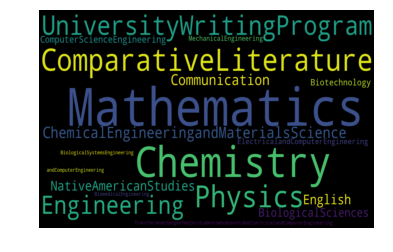

College of Letters and Science Word Cloud


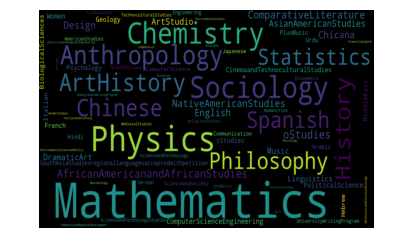

College of Agriculture and Environmental Sciences Word Cloud


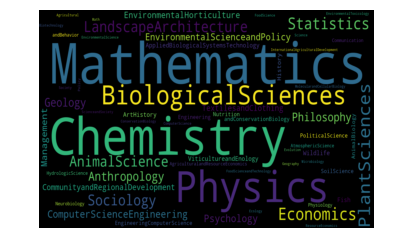

College of Biological ScienceWord Cloud


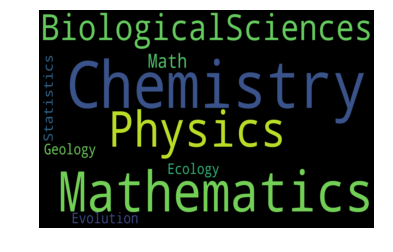

Fine Arts Word Cloud


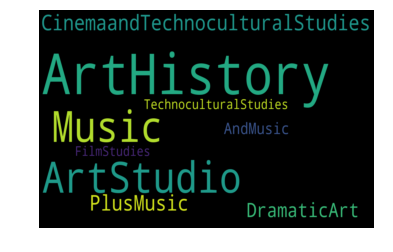

Social Sciences Word Cloud


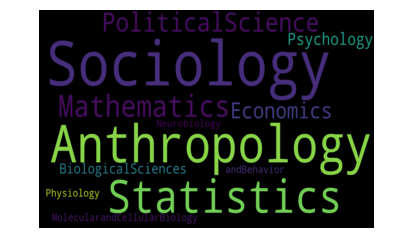

Physical Sciences Word Cloud


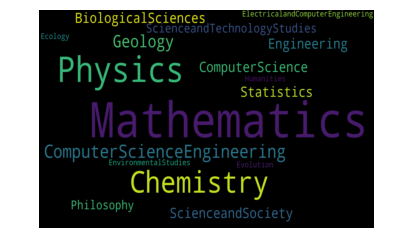

Humanties Word Cloud


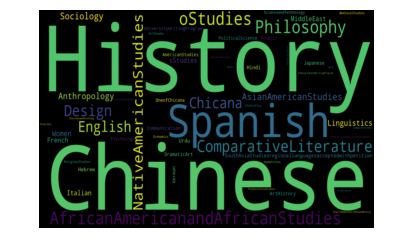

Wordcloud for all Majors


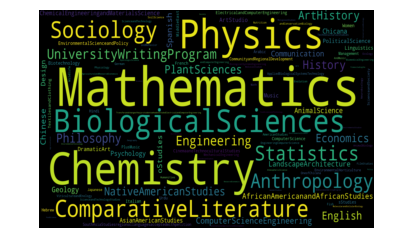

In [77]:
# Generating a wordcloud for each dataframe
combinedWordCloud = WordCloud(width=1800,height=1000,collocations = False).generate(combinedText)
engWordCloud = WordCloud(width=1800,height=1000,collocations = False).generate(engCombinedText)
lsWordCloud = WordCloud(width=1800,height=1000,collocations = False).generate(lsCombinedText)
agWordCloud = WordCloud(width=1800,height=1000,collocations = False).generate(agCombinedText)
bioWordCloud = WordCloud(width=1800,height=1000,collocations = False).generate(bioCombinedText)
faWordCloud = WordCloud(width=1800,height=1000,collocations = False).generate(faCombinedText)
ssWordCloud = WordCloud(width=1800,height=1000,collocations = False).generate(ssCombinedText)
mpWordCloud = WordCloud(width=1800,height=1000,collocations = False).generate(mpCombinedText)
hmWordCloud = WordCloud(width=1800,height=1000,collocations = False).generate(hmCombinedText)

"""
This function takes a string of course subject areas and creates a wordcloud based on which subject areas are most often required courses. The files are then saved in a wordcloud folder to use for the final report.

Inputs:
    name: The Title for the Word Cloud
    wordCloud: The file containing the text that will be used for the Word Cloud
    fileName: The file that will the wordCloud will be saved as
    
Outputs:
    The generated Word Cloud.
    
"""

# Printing the wordclouds
def printWordCloud(name, wordCloud, fileName):   
    plt.clf()
    print(name)
    plt.imshow(wordCloud, interpolation='bilinear',aspect='auto')
    plt.axis('off')
    plt.savefig('WordCloudFolder/' + fileName + '.png')
    plt.show()
    

printWordCloud('College of Engineering Word Cloud', engWordCloud, 'engCloud')
printWordCloud('College of Letters and Science Word Cloud', lsWordCloud, 'lsCloud')
printWordCloud('College of Agriculture and Environmental Sciences Word Cloud', agWordCloud, "agCloud")
printWordCloud('College of Biological ScienceWord Cloud', bioWordCloud, 'bioCloud')

printWordCloud('Fine Arts Word Cloud', faWordCloud, 'faCloud')
printWordCloud('Social Sciences Word Cloud', ssWordCloud, 'ssCloud')
printWordCloud('Physical Sciences Word Cloud', mpWordCloud, "mpCloud")
printWordCloud('Humanties Word Cloud', hmWordCloud, 'hmCloud')

printWordCloud('Wordcloud for all Majors', combinedWordCloud, 'combinedCloud')


The next step is to create bar plots that include both the subject area (i.e. Mathematics) and the associated course number (i.e. 21A). This is because we want to look at the frequency of each individual course.

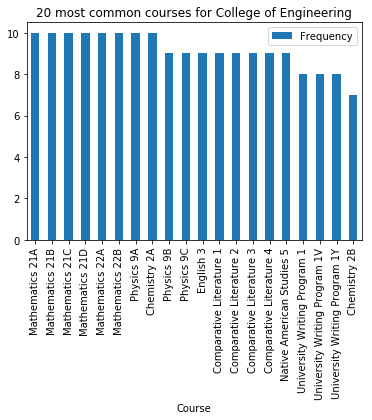

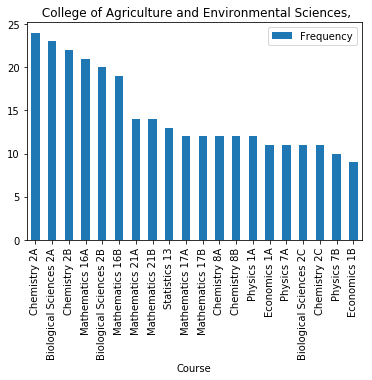

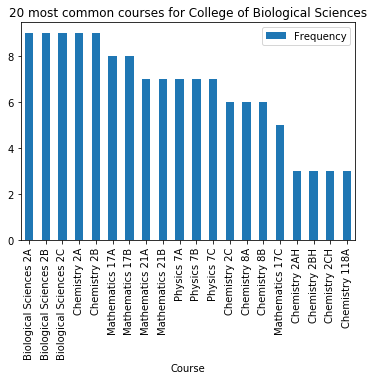

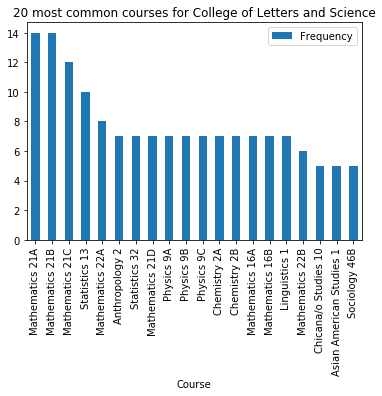

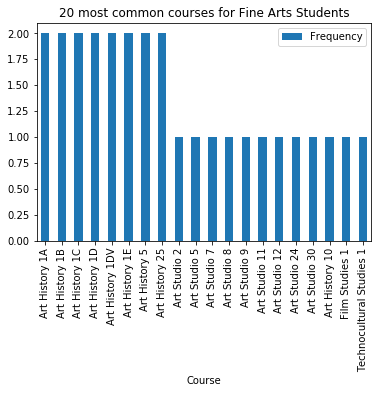

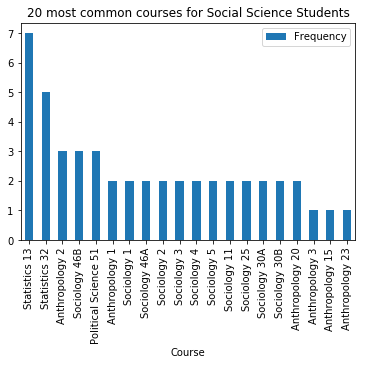

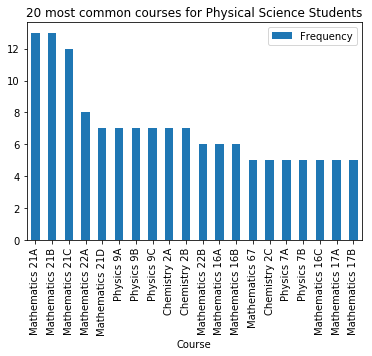

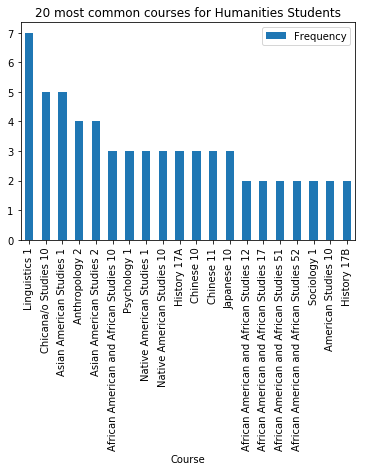

In [82]:
# Plotting bar plots

plt.clf()
import pandas
from collections import Counter

"""
This function takes a string of course subject areas and numbers and creates a bar plot based on which courses are most often listed as a prerequisite. The files are then saved in a bar plot folder to use for the final report.

Inputs:
    courseList: The list of course subject areas and numbers
    plotTitle: The title for the bar plot
    fileName: The file that will the wordCloud will be saved as
    
Outputs:
    The generated bar plot.   
"""

def createCourseBarPlot(courseList, plotTitle, fileName):
    courseCounts = Counter(courseList)
    df = pandas.DataFrame(courseCounts.most_common()[:20])
    df.columns = ['Course','Frequency']
    df = df.set_index('Course')
    df.plot(kind = 'bar', title = plotTitle)
    plt.savefig('BarPlotsFolder/' + fileName + '.png',bbox_inches='tight',dpi=100)
    plt.show()

# Creating bar plots for the four colleges
createCourseBarPlot(engCourseList,'20 most common courses for College of Engineering', 'engBarPlot')
createCourseBarPlot(agCourseList,' College of Agriculture and Environmental Sciences,', 'agBarPlot')
createCourseBarPlot(bioCourseList,'20 most common courses for College of Biological Sciences', 'bioBarPlot')
createCourseBarPlot(lsCourseList,'20 most common courses for College of Letters and Science', 'lsBarPlot')

# Creating bar plots for the major cluters in the college of Letters and Science
createCourseBarPlot(faCourseList,'20 most common courses for Fine Arts Students', 'faBarPlot')
createCourseBarPlot(ssCourseList,'20 most common courses for Social Science Students', 'ssBarPlot')
createCourseBarPlot(mpCourseList,'20 most common courses for Physical Science Students', 'mpBarPlot')
createCourseBarPlot(hmCourseList,'20 most common courses for Humanities Students', 'hmBarPlot')


        